#Netflix Data:Cleaning,Analysis and Visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel("Netflix.xlsx")
print(df)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2

In [7]:
df.shape

(8790, 10)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-04-06 20:59:37.883959040,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-01-11 00:00:00,2013.000000
50%,2019-05-12 00:00:00,2017.000000
75%,2020-07-10 00:00:00,2019.000000
max,2021-12-08 00:00:00,2021.000000
std,NaN,8.825466


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

#Exploratory Data Analysis (EDA)

1.count the number of Movies and TV Shows

Text(0.5, 0.98, 'Total Content on Netflix')

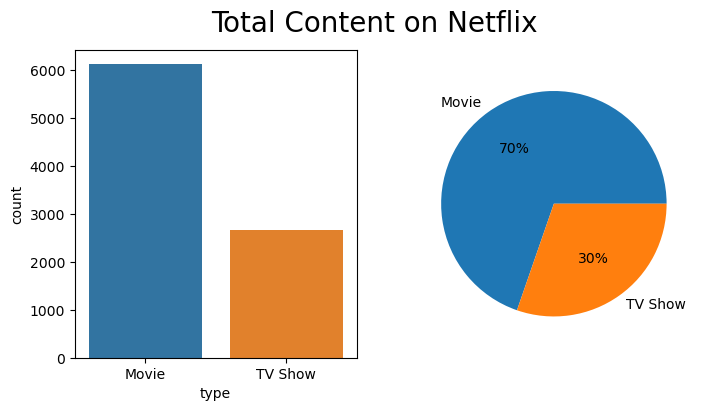

In [19]:
# type_counts=df["type"].value_counts()
# plt.figure(figsize=(6,6))
# sns.barplot(x=type_counts.index,y=type_counts.values)#,palette="Set4"
# plt.title("Distribution of Contents by Type")
# plt.xlabel("Type")
# plt.ylabel("Count")
# plt.show()

#content distribution on Netflix
# df['type'].value_counts()
freq=df['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(df,x=df['type'],ax=axes[0])
plt.pie(freq,labels=['Movie','TV Show'],autopct='%.0f%%')
plt.suptitle('Total Content on Netflix',fontsize=20)


#count of Movies is higher than TV Shows

2.Most Common Genres

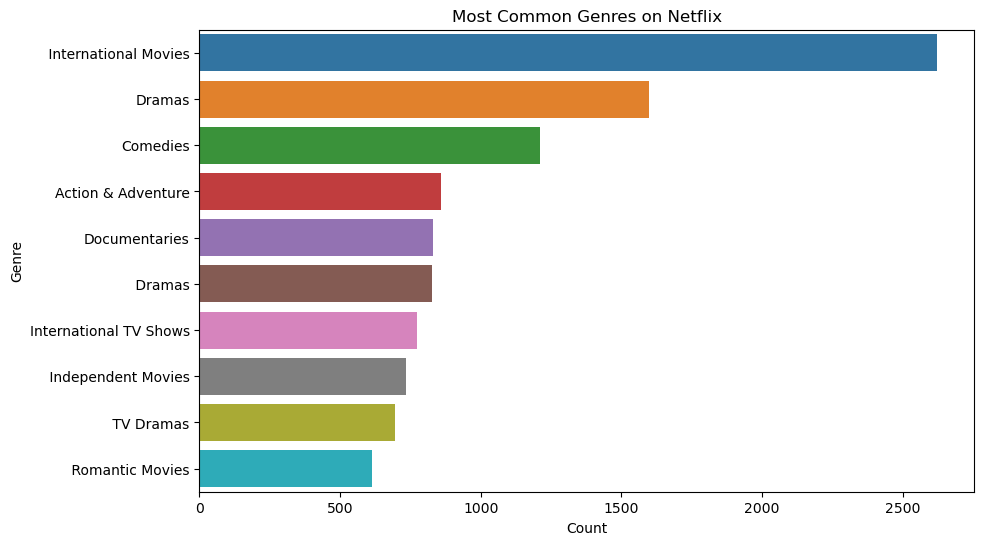

In [21]:
df['genres']=df['listed_in'].apply(lambda x:x.split(','))
all_genres=sum(df['genres'],[])
genre_counts=pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values,y=genre_counts.index)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#International Movies Count is higher than all others

3.Content Added Over Time

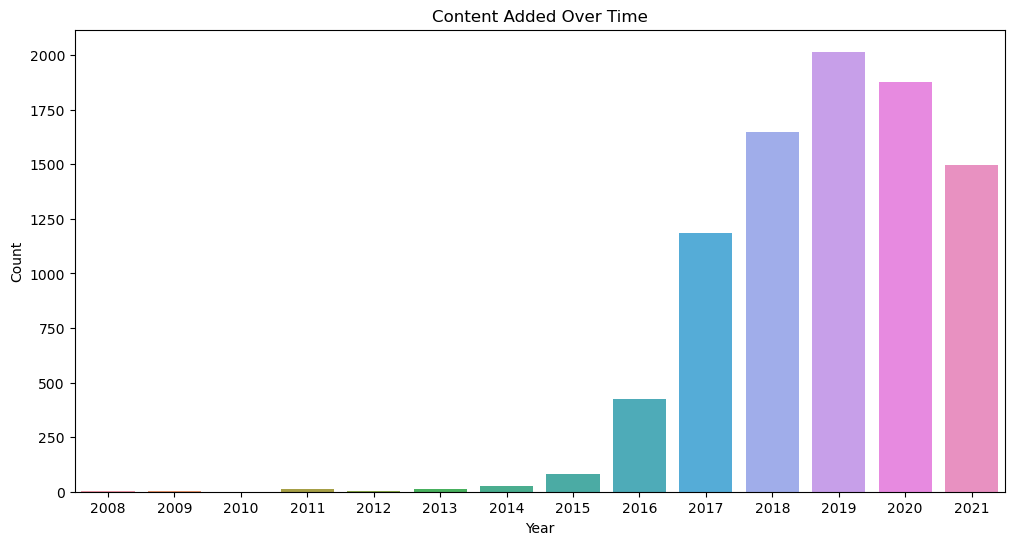

In [39]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
plt.figure(figsize=(12,6))
sns.countplot(x='year_added',data=df)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()

#more content added in 2019

4.Top 10 Directors with the Most Titles

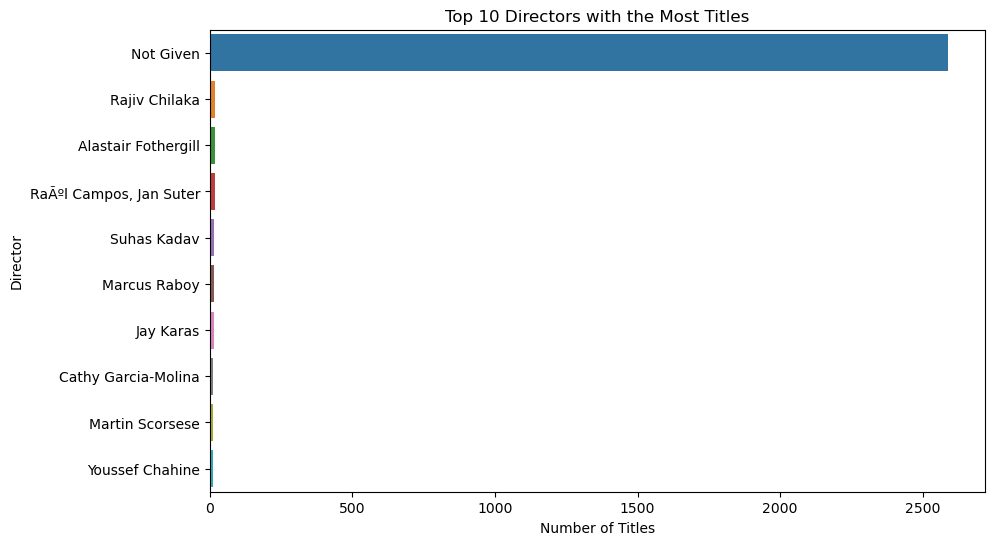

In [41]:
top_directors=df['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values,y=top_directors.index)#,palette='Blues_d'
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

5.Ratingwise distribution

In [112]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

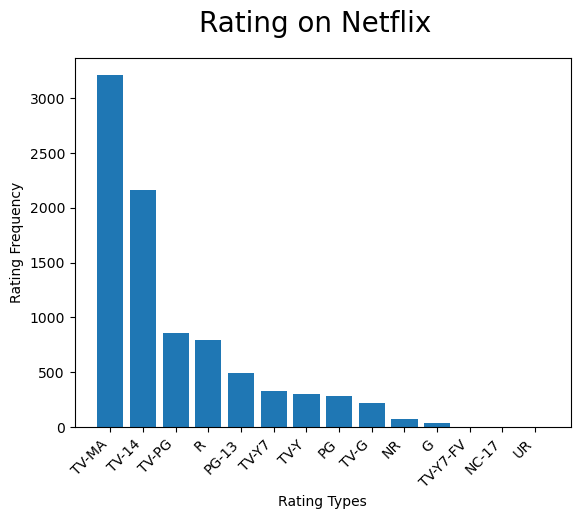

In [27]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.suptitle('Rating on Netflix',fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

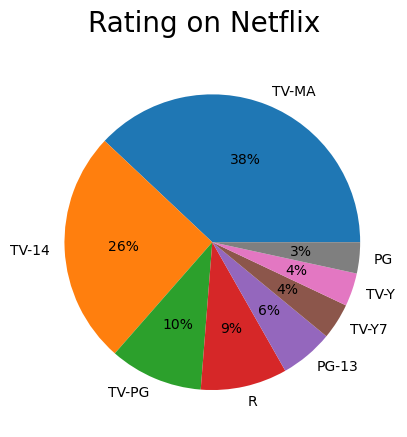

In [29]:
plt.pie(ratings['count'][:8],labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Rating on Netflix',fontsize=20)

#Converting date_added column to datetime

In [37]:
df['date_added']=pd.to_datetime(df['date_added'])
#df

In [31]:
df['country'].value_counts()

country
United States     3527
India             1057
United Kingdom     638
Pakistan           421
Canada             271
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 85, dtype: int64

#Top 10 contries with most contents on Netflix

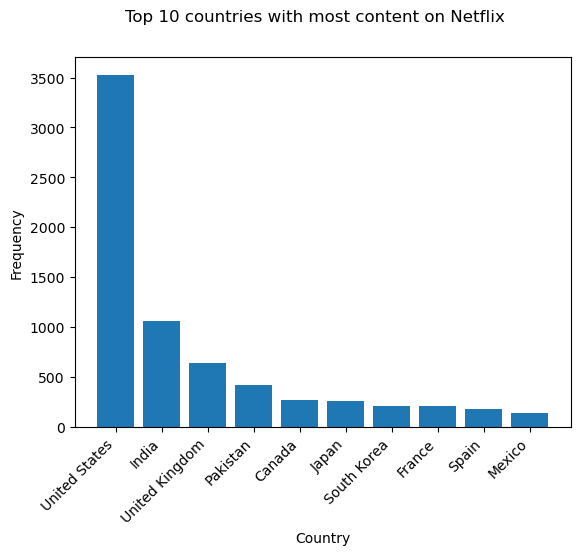

In [33]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.suptitle('Top 10 countries with most content on Netflix')
plt.show()

In [135]:
df['day']=df['date_added'].dt.day

#Monthly releases of Movies and TV shows on Netflix

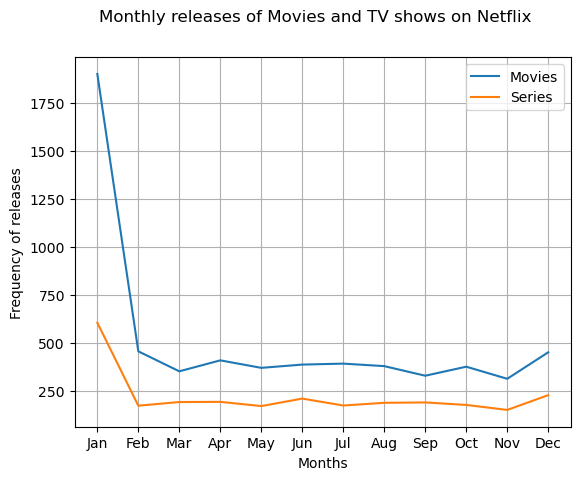

In [49]:
monthly_movie_release=df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month_added'].value_counts().sort_index()
plt.plot(monthly_movie_release.index,monthly_movie_release.values,label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values,label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle('Monthly releases of Movies and TV shows on Netflix')
plt.show()

#Yearly releases of movies and Tv Shows on Netflix

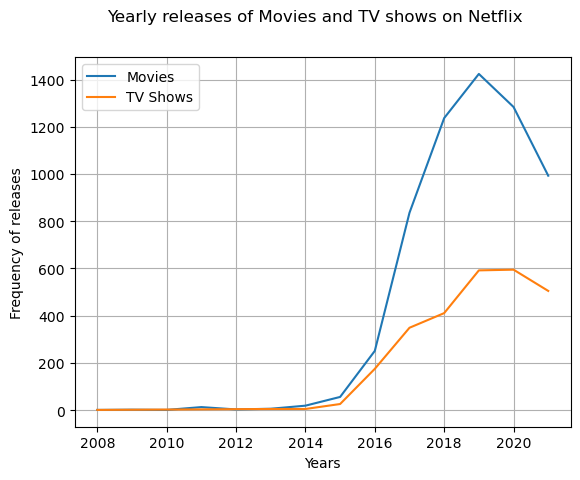

In [51]:
yearly_movie_release=df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_release=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()
plt.plot(yearly_movie_release.index,yearly_movie_release.values,label='Movies')
plt.plot(yearly_series_release.index,yearly_series_release.values,label='TV Shows')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.legend()
plt.grid(True)
plt.suptitle('Yearly releases of Movies and TV shows on Netflix')
plt.show()

#Top 10 popular movie genres

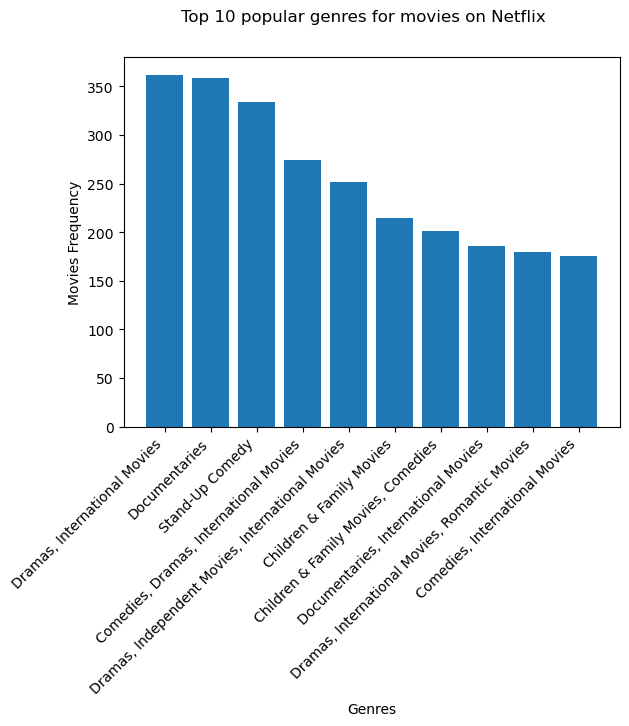

In [64]:
popular_movie_genre=df[df['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Shows'].groupby('listed_in').size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index,popular_movie_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular genres for movies on Netflix')
plt.show()

#Top 10 TV Shows genres

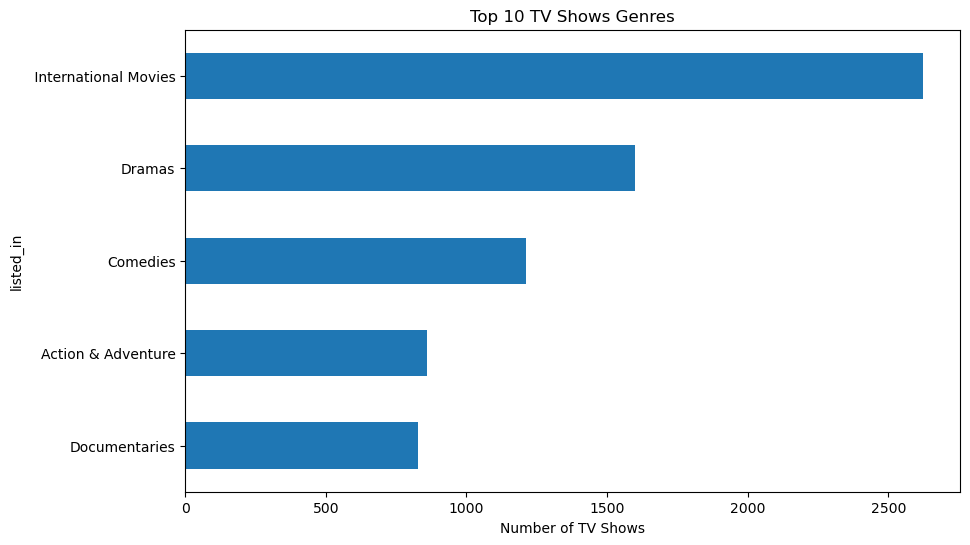

In [82]:
df_exploded=df['listed_in'].str.split(',').explode()
genre_counts=df_exploded.value_counts().head()
plt.figure(figsize=(10,6))
genre_counts.sort_values(ascending=True).plot(kind='barh')#,color='skyblue')
plt.xlabel('Number of TV Shows')
plt.title('Top 10 TV Shows Genres')
plt.show()

#Top 15 directors across Netflix with high frequency of movies and shows.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'RaÃºl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

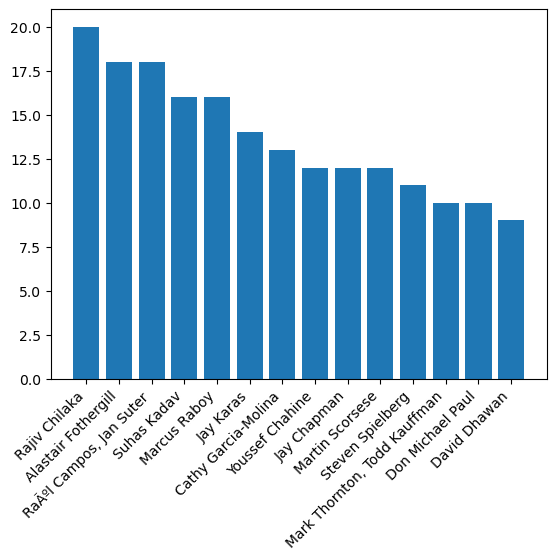

In [71]:
directors=df['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'],directors['count'])
plt.xticks(rotation=45,ha='right')

#Insights:

1.Content Split: Movies dominate Netflix`s libraray, making up 70%,compared to 30% for TV shows.
2.Popular Genres: Interantional movies,dramas, and comedies are the most common generes.
3.Peak Years: Most contents was added in 2019 and 2020, likely due to growing demand.
4.Ratings: The most frequent ratings are TV-MA(38%) and TV-14(26%),Targeting mature viewers and teens.
5.Regional Focus: The U.S. leads in content released in January.
6.A majority of releases accurred between 2017 and 2020 and also, Most movies and shows are released in january.

#Recommendations:

1.Increase the number of Tv Shows to balance the content libraray.
2.Invest in regional content,especially for markets like india.
3.Diversify generes by focusing on thrillers, documentries, and animations.
4.Create more family-friendly contents to appeal to younger audiences.
5.Leverage the january release trend with strong marketing campaigns.

#Conclusion:

Netflix focus on movies, mature audiences, and global genres has driven its growth.
Expanding IV shows, regional content, and family-friendly options can help sustain its leadership in the streaming market.